<a href="https://colab.research.google.com/github/thuyk39nguyen/AIO/blob/main/Modul5_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
dataset_path = '/content/creditcard.csv'
df = pd.read_csv(dataset_path)

In [37]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45641,42436,-2.481639,-2.439949,0.363642,1.216827,2.572442,-1.264220,-0.443652,0.075853,0.073188,...,-0.039426,0.480591,1.779358,-0.756700,-0.161099,0.685617,0.223071,0.139619,0.00,0.0
45642,42436,1.223475,0.014944,0.471312,-0.038410,-0.566793,-0.867970,-0.058213,-0.144080,0.164904,...,-0.053292,-0.093680,0.106348,0.471407,0.135555,0.968336,-0.065171,0.005184,7.49,0.0
45643,42436,1.258657,0.421016,0.325437,0.684259,-0.292529,-1.052786,0.145228,-0.253567,-0.100521,...,-0.278029,-0.757417,0.119613,0.369393,0.246145,0.091553,-0.017156,0.032557,0.89,0.0
45644,42437,-0.500147,1.000770,1.809639,-0.114551,0.333865,-0.577076,1.062325,-0.513050,-0.048285,...,-0.193814,-0.161410,0.036965,0.400154,-0.802486,-0.076097,-0.214317,-0.229160,2.69,0.0


In [38]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [40]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, : -1].astype(np.float64 ), dataset_arr [: , -1].astype(np.uint8 )

<ipython-input-40-a299d8024d09>:2: RuntimeWarning: invalid value encountered in cast
  X, y = dataset_arr[:, : -1].astype(np.float64 ), dataset_arr [: , -1].astype(np.uint8 )


In [43]:
intercept = np.ones(( X. shape[0], 1))
X_b = np.concatenate(( intercept, X), axis =1)

One-hot encoding label

In [44]:
n_classes = np.unique(y, axis = 0).shape [0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros (n_classes) for _ in range(n_samples )])
y_encoded [np.arange(n_samples), y] = 1

In [45]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val, y_train , y_val = train_test_split (X_b , y_encoded, test_size = val_size , random_state = random_state, shuffle = is_shuffle)
X_train, X_test, y_train, y_test = train_test_split (X_train, y_train, test_size = test_size, random_state = random_state, shuffle = is_shuffle)

Chuẩn hóa dữ liệu

In [46]:
normalizer = StandardScaler ()
X_train [: , 1:] = normalizer . fit_transform ( X_train [: , 1:])
X_val [: , 1:] = normalizer . transform ( X_val [: , 1:])
X_test [: , 1:] = normalizer . transform ( X_test [: , 1:])

In [ ]:
def softmax(z) :
  exp_z = np.exp(z)

  return exp_z/exp_z.sum(axis =1) [:, None ]

def compute_loss(y_hat, y):
  n = y.size

  return (-1 / n) * np.sum (y * np.log(y_hat))

def predict (X, theta ):
  z = np. dot (X, theta )
  y_hat = softmax (z)

  return y_hat

def compute_gradient (X, y, y_hat ) :
  n = y. size

  return np.dot(X.T,( y_hat - y) ) / n

def update_theta (theta , gradient, lr) :
  return theta - lr * gradient

def compute_accuracy(X, y, theta ) :
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis =1) == np.argmax(y, axis =1) ).mean()
  return acc

In [47]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape [1]

np. random.seed(random_state )
theta = np.random.uniform (size =( n_features , n_classes))

Huấn luyện mô hình:

In [49]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range ( epochs ) :
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range (0 , X_train . shape [0] , batch_size ) :
    X_i = X_train [i:i+ batch_size ]
    y_i = y_train [i:i+ batch_size ]

    y_hat = predict (X_i , theta )
    train_loss = compute_loss (y_hat , y_i )

    gradient = compute_gradient (X_i , y_i , y_hat )

    theta = update_theta (theta , gradient , lr)

    train_batch_losses . append ( train_loss )

    train_acc = compute_accuracy ( X_train , y_train , theta )
    train_batch_accs . append ( train_acc )

    y_val_hat = predict (X_val , theta )
    val_loss = compute_loss(y_val_hat , y_val )
    val_batch_losses.append(val_loss )

    val_acc = compute_accuracy(X_val, y_val, theta )
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses ) / len (train_batch_losses )
  val_batch_loss = sum(val_batch_losses ) / len ( val_batch_losses )
  train_batch_acc = sum(train_batch_accs ) / len ( train_batch_accs )
  val_batch_acc = sum ( val_batch_accs ) / len ( val_batch_accs )

  train_losses.append ( train_batch_loss )
  val_losses.append ( val_batch_loss )
  train_accs.append ( train_batch_acc )
  val_accs.append ( val_batch_acc )
  print (f'\nEPOCH { epoch + 1}:\tTraining loss: { train_batch_loss :.3f}\tValidation loss: { val_batch_loss :.3f}')


EPOCH 1:	Training loss: 0.337	Validation loss: nan

EPOCH 2:	Training loss: 0.305	Validation loss: nan

EPOCH 3:	Training loss: 0.278	Validation loss: nan

EPOCH 4:	Training loss: 0.253	Validation loss: nan

EPOCH 5:	Training loss: 0.231	Validation loss: nan

EPOCH 6:	Training loss: 0.212	Validation loss: nan

EPOCH 7:	Training loss: 0.195	Validation loss: nan

EPOCH 8:	Training loss: 0.180	Validation loss: nan

EPOCH 9:	Training loss: 0.167	Validation loss: nan

EPOCH 10:	Training loss: 0.155	Validation loss: nan

EPOCH 11:	Training loss: 0.144	Validation loss: nan

EPOCH 12:	Training loss: 0.135	Validation loss: nan

EPOCH 13:	Training loss: 0.126	Validation loss: nan

EPOCH 14:	Training loss: 0.119	Validation loss: nan

EPOCH 15:	Training loss: 0.112	Validation loss: nan

EPOCH 16:	Training loss: 0.105	Validation loss: nan

EPOCH 17:	Training loss: 0.100	Validation loss: nan

EPOCH 18:	Training loss: 0.095	Validation loss: nan

EPOCH 19:	Training loss: 0.090	Validation loss: nan

E

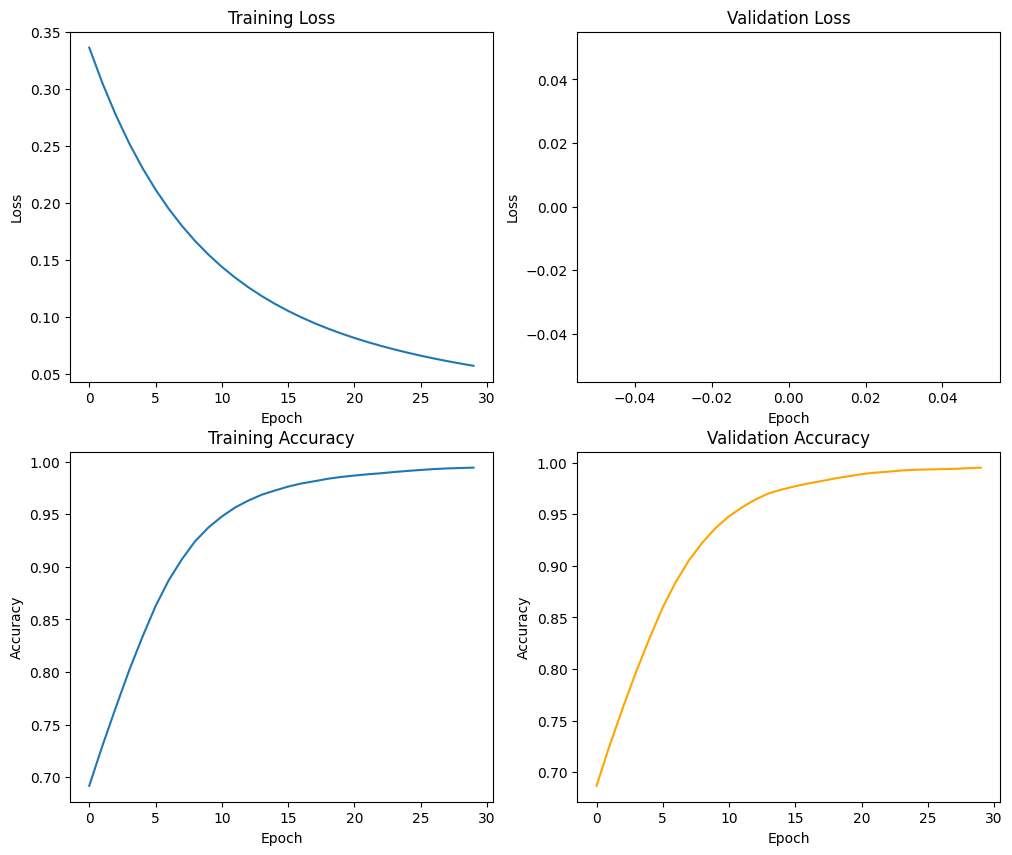

In [50]:
fig, ax = plt.subplots(2, 2, figsize =(12 , 10) )
ax [0, 0].plot(train_losses )
ax [0, 0].set( xlabel ='Epoch', ylabel ='Loss')
ax [0, 0].set_title('Training Loss')

ax [0, 1].plot( val_losses, 'orange')
ax [0, 1].set( xlabel ='Epoch', ylabel ='Loss')
ax [0, 1].set_title ('Validation Loss')

ax [1, 0].plot( train_accs )
ax [1, 0].set( xlabel ='Epoch', ylabel ='Accuracy')
ax [1, 0].set_title('Training Accuracy')

ax [1, 1].plot( val_accs , 'orange')
ax [1, 1].set( xlabel ='Epoch', ylabel ='Accuracy')
ax [1, 1].set_title ('Validation Accuracy')

plt.show ()

Đánh giá mô hình:

In [52]:
val_set_acc = compute_accuracy (X_val, y_val, theta )
test_set_acc = compute_accuracy ( X_test, y_test, theta )
print ('Evaluation on validation and test set:')
print (f'Accuracy:{val_set_acc}')
print (f'Accuracy:{test_set_acc}')

Evaluation on validation and test set:
Accuracy:0.9953997809419496
Accuracy:0.9964950711938664


# **Twitter Sentiment Analysis**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
dataset_path="/content/Twitter_Data.csv"
df=pd.read_csv(dataset_path)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [23]:
df.isnull().sum()

,0
clean_text,4
category,7


In [24]:
df.dropna()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


Chuẩn hóa văn bản thành vector

In [21]:
def text_normalize(text):
  text=text.lower()
  text=re.sub(r'~rt[\s]+','',text)
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'[^\w\s]', '', text)

  stop_words = stopwords.words('english')
  text_list = text.split()
  text_list = [word for word in text_list if word not in stop_words]
  text = ' '.join(text_list)

  stemmer = SnowballStemmer('english')
  text_list = text.split()
  text_list = [stemmer.stem(word) for word in text_list]
  text = ' '.join(text_list)
  return text


In [26]:
df['clean_text'] = df['clean_text'].fillna('')
vectorizer = TfidfVectorizer (max_features =2000)
X = vectorizer.fit_transform (df['clean_text']).toarray()

Thêm bias vào X

In [29]:
intercept = np.ones(( X. shape [0], 1))
X_b = np. concatenate(( intercept, X) , axis =1)

One-hot encoding label

In [27]:
n_classes = df['category'].nunique ()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype (np.uint8 )
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded [np.arange( n_samples ), y] = 1

<ipython-input-27-825341c0c9a5>:5: RuntimeWarning: invalid value encountered in cast
  y = y.astype (np.uint8 )


In [30]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val, y_train , y_val = train_test_split (X_b , y_encoded, test_size = val_size , random_state = random_state, shuffle = is_shuffle)
X_train, X_test, y_train, y_test = train_test_split (X_train, y_train, test_size = test_size, random_state = random_state, shuffle = is_shuffle)

In [31]:
def softmax(z) :
  exp_z = np.exp(z)

  return exp_z/exp_z.sum(axis =1) [:, None ]

def compute_loss(y_hat, y):
  n = y.size

  return (-1 / n) * np.sum (y * np.log(y_hat))

def predict (X, theta ):
  z = np. dot (X, theta )
  y_hat = softmax (z)

  return y_hat

def compute_gradient (X, y, y_hat ) :
  n = y. size

  return np.dot(X.T, ( y_hat - y) ) / n

def update_theta (theta , gradient, lr) :
  return theta - lr * gradient

def compute_accuracy(X, y, theta ) :
  y_hat = predict(X, theta )
  acc = (np.argmax(y_hat, axis =1) == np.argmax(y, axis =1) ).mean ()
  return acc

In [33]:
lr = 0.1
epochs = 200
batch_size = X_train.shape [0]
n_features = X_train.shape [1]

np.random.seed(random_state )
theta = np.random. uniform (size =(n_features, n_classes))

In [34]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.35878635415388394
Accuracy : 0.3605350349736164
